In [1]:
from skimage.io import imread,imshow
from skimage import util
from scipy.spatial.distance import cdist
import numpy as np
import random
import statistics
import matplotlib as plt

# Images

### Mona Lisa

In [2]:
monaLisa=imread("q1data/Mona-lisa.PNG")
monaLisa_s1=imread("q1data/Mona-lisa stroke 1.PNG")
monaLisa_s2=imread("q1data/Mona-lisa stroke 2.PNG")

### Lady

In [4]:
lady=imread("q1data/lady.PNG")
lady_s1=imread("q1data/lady stroke 1.PNG")
lady_s2=imread("q1data/lady stroke 2.PNG")

### van Gogh

In [5]:
van=imread("q1data/van Gogh.PNG")
van_s=imread("q1data/van Gogh stroke.PNG")

### K MEANS ALGORITHM

In [36]:
def KNN(N,dataPoint):

    datapoints=dataPoint.copy()
    new_cluster=[]
    old_cluster=[]
    centroids=[]
    iterations=0

    centroids=random.sample(dataPoint,N)

    while True:
        
        for datapoint in datapoints:
            e_distance=[]
            for centriod in centroids:
                e_distance.append(np.linalg.norm(np.array(datapoint)-np.array(centriod),ord=2))
            new_cluster.append(e_distance.index(min(e_distance)))

        if len(old_cluster)!=0:
            if new_cluster == old_cluster or iterations==100:
                return new_cluster,centroids
            # else:
            #     matches=0
            #     for i in range(len(new_cluster)):
            #         if new_cluster[i] == old_cluster[i]:
            #             matches += 1
            #     print(matches," matched out of ",len(new_cluster))

        old_cluster=new_cluster.copy()
        for i in range(0,N):
            new_centroid=[]
            for index in range(0,len(new_cluster)):
                if new_cluster[index]==i:
                    new_centroid.append(datapoints[index])
            try:
                mean=np.mean(new_centroid,axis=0)
                centroids.append(list(mean))
                del centroids[0]
                
            except:
                pass

        new_cluster=[]
        iterations=iterations+1
    

### Lazy Snapping Algorithm

In [78]:
def lazySnappingAlgo(strokeImg,N_clusters,originalImg):
    foreground=[]
    background=[]
    for a in range(0,len(strokeImg)):
            for b in range(0,len(strokeImg[a])):
                if strokeImg[a][b][0]==255:
                    foreground.append(list(originalImg[a][b]))
                if strokeImg[a][b][2]==255:
                    background.append(list(originalImg[a][b]))

    f_clusterLabels,f_centriods=KNN(N_clusters,foreground)
    b_clusterLabels,b_centriods=KNN(N_clusters,background)

    tmpImg=np.ones(originalImg.shape)*255
    for a in range(0,len(originalImg)):
        for b in range(0,len(originalImg[a])):
            sum_foreground=0
            sum_background=0
            for j in range(0,len(f_centriods)):
                sum_foreground=sum_foreground+0.1*np.exp(-1*(np.linalg.norm(originalImg[a][b]-np.array(f_centriods[j]),ord=2))**2)
                sum_background=sum_background+0.1*np.exp(-1*(np.linalg.norm(originalImg[a][b]-np.array(b_centriods[j]),ord=2))**2)

            if sum_foreground > sum_background:
                tmpImg[a][b]=originalImg[a][b]

    tmpImg=(tmpImg*1).astype(np.uint8)
    imshow(tmpImg)

# FOR N=64

## Mona Lisa and Stroke 1

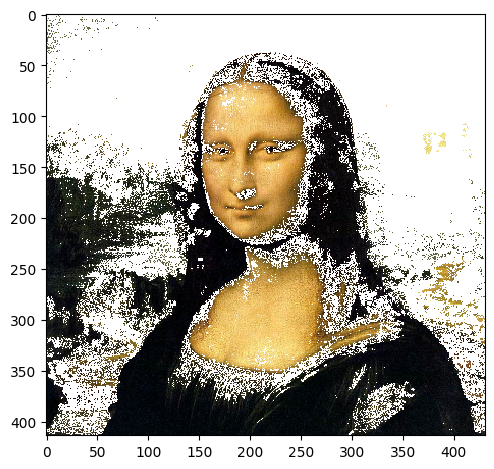

In [79]:
lazySnappingAlgo(monaLisa_s1,64,monaLisa)

## Mona Lisa and Stroke 2

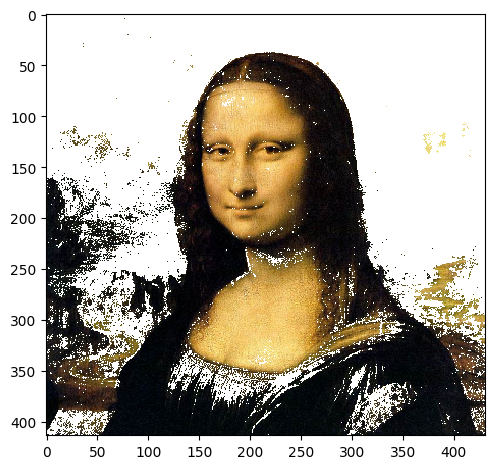

In [80]:
lazySnappingAlgo(monaLisa_s2,64,monaLisa)

## Lady and Stroke 1

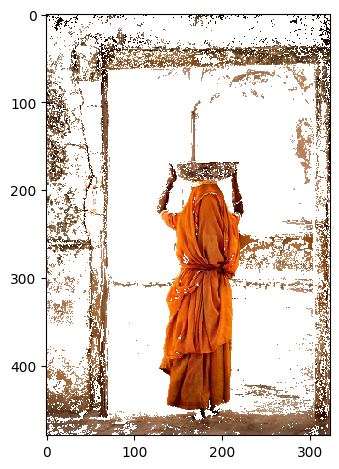

In [81]:
lazySnappingAlgo(lady_s1,64,lady)

## Lady and Stroke 2

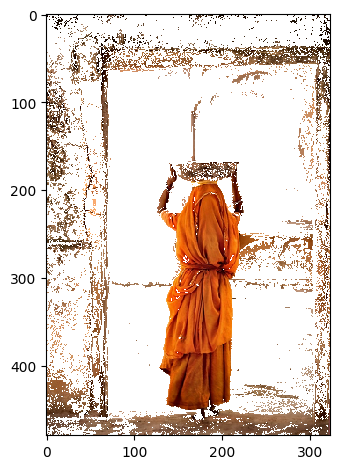

In [82]:
lazySnappingAlgo(lady_s2,64,lady)

## van Gogh and Stroke

In [83]:
lazySnappingAlgo(van_s,64,van)

# TRYING FOR LOWER VALUE OF N (N=40)

## Mona Lisa and Stroke 1

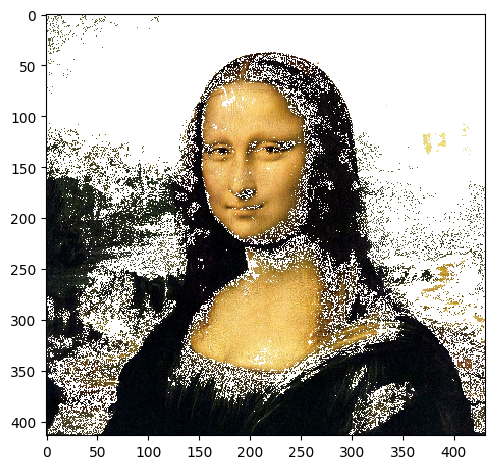

In [85]:
lazySnappingAlgo(monaLisa_s1,40,monaLisa)

## Mona Lisa and Stroke 2

In [86]:
lazySnappingAlgo(monaLisa_s2,40,monaLisa)

## Lady and Stroke 1

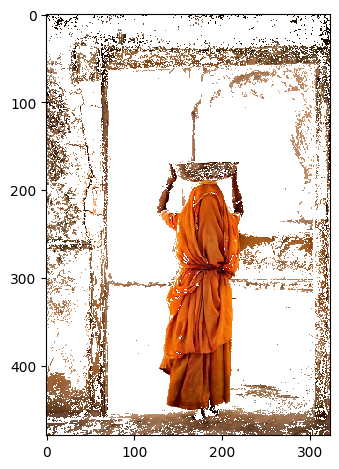

In [87]:
lazySnappingAlgo(lady_s1,40,lady)

## Lady and Stroke 2

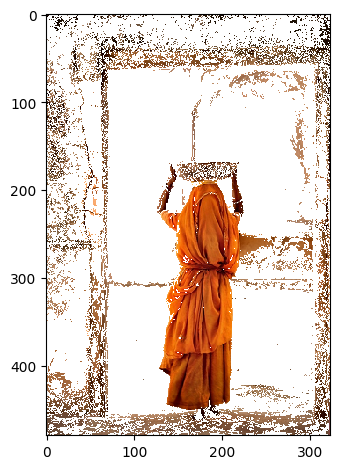

In [88]:
lazySnappingAlgo(lady_s2,40,lady)

## Van Gogh and Stroke

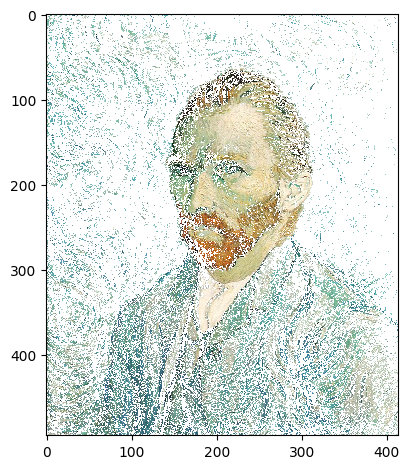

In [89]:
lazySnappingAlgo(van_s,40,van)

# TRYING FOR HIGHER VALUE OF N (N=80)

## Mona Lisa and Stroke 1

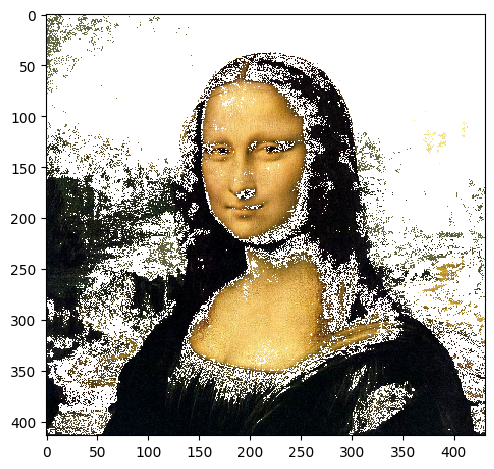

In [90]:
lazySnappingAlgo(monaLisa_s1,80,monaLisa)

## Mona Lisa and Stroke 2

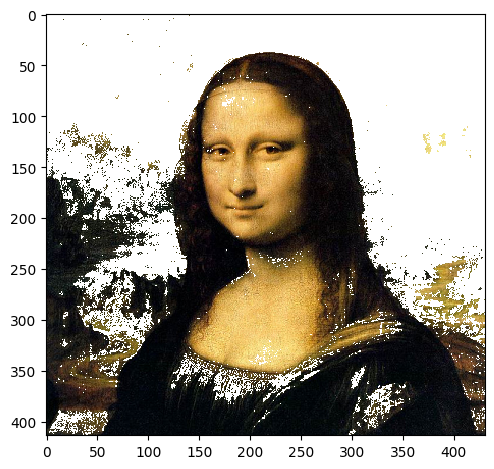

In [95]:
lazySnappingAlgo(monaLisa_s2,80,monaLisa)

## Lady and Stroke 1

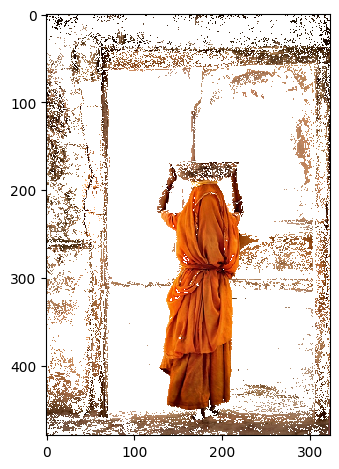

In [92]:
lazySnappingAlgo(lady_s1,80,lady)

## Lady and Stroke 2

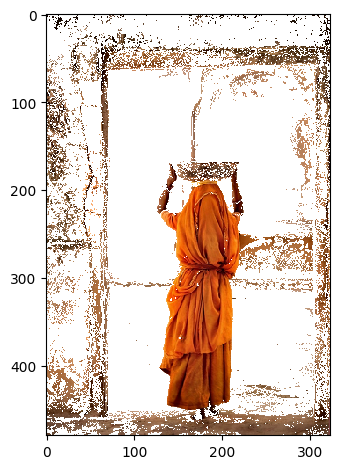

In [93]:
lazySnappingAlgo(lady_s2,80,lady)

## Van Gogh and Stroke

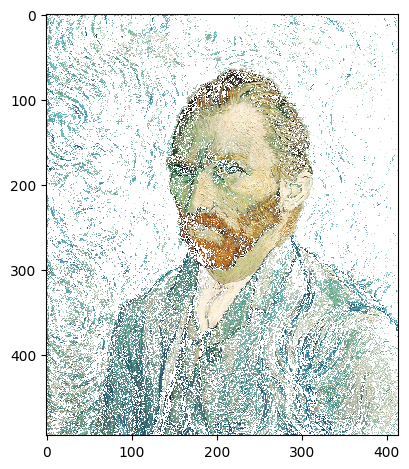

In [94]:
lazySnappingAlgo(van_s,80,van)